In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
%matplotlib inline

df = pd.read_csv('../build/perfs.csv', delimiter=',', na_values='na')
# drop the last empty column
df = df.iloc[:, :-1]
columns = df.columns.tolist()
for column in columns:
    print("Column name: %s" % column)

Column name: first_fwrite_end_core_ticks
Column name: first_fwrite_start_core_ticks
Column name: last_file_op_ms
Column name: last_memset_end_core_ticks
Column name: last_memset_start_core_ticks


In [2]:
df_memset_ticks = df[['last_memset_start_core_ticks', 'last_memset_end_core_ticks']].dropna()
df_file_ops_ms = df['last_file_op_ms'].dropna()
df_fwrite_ticks = df[['first_fwrite_start_core_ticks', 'first_fwrite_end_core_ticks']].dropna()

In [3]:
print('df_memset_ticks info:')
df_memset_ticks.info()

print('\ndf_fwrite_ticks info:')
df_fwrite_ticks.info()

print('\ndf_file_ops_ms length:')
print(type(df_file_ops_ms))
print('Length: %d' % len(df_file_ops_ms))

df_memset_ticks info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
last_memset_start_core_ticks    1000 non-null float64
last_memset_end_core_ticks      1000 non-null float64
dtypes: float64(2)
memory usage: 23.4 KB

df_fwrite_ticks info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 2 columns):
first_fwrite_start_core_ticks    2000 non-null float64
first_fwrite_end_core_ticks      2000 non-null float64
dtypes: float64(2)
memory usage: 46.9 KB

df_file_ops_ms length:
<class 'pandas.core.series.Series'>
Length: 5000


In [4]:
df_memset_ticks['duration'] = df_memset_ticks['last_memset_end_core_ticks'] - \
    df_memset_ticks['last_memset_start_core_ticks']
# Remove < 0 durations since they correspond to TSC overflow
df_memset_ticks = df_memset_ticks[df_memset_ticks['duration'] >= 0]
df_memset_ticks['duration'].describe()

count    1000.000000
mean       30.036000
std         8.290805
min        23.000000
25%        27.000000
50%        28.000000
75%        30.000000
max        85.000000
Name: duration, dtype: float64

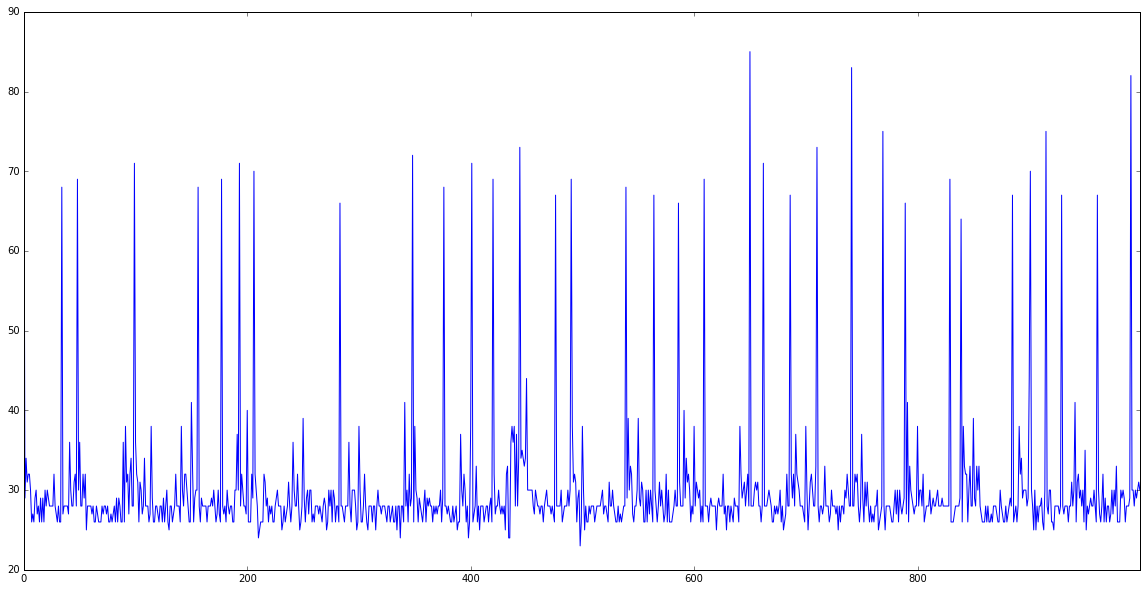

In [5]:
df_memset_ticks['duration'].plot(figsize=(20,10))

In [6]:
df_fwrite_ticks['duration'] = df_fwrite_ticks['first_fwrite_end_core_ticks'] - \
    df_fwrite_ticks['first_fwrite_start_core_ticks']
# Remove < 0 durations since they correspond to TSC overflow
df_fwrite_ticks = df_fwrite_ticks[df_fwrite_ticks['duration'] >= 0]
df_fwrite_ticks['duration'].describe()

count    2.000000e+03
mean     1.357795e+03
std      3.612263e+04
min      2.130000e+02
25%      2.420000e+02
50%      2.540000e+02
75%      2.790000e+02
max      1.613474e+06
Name: duration, dtype: float64

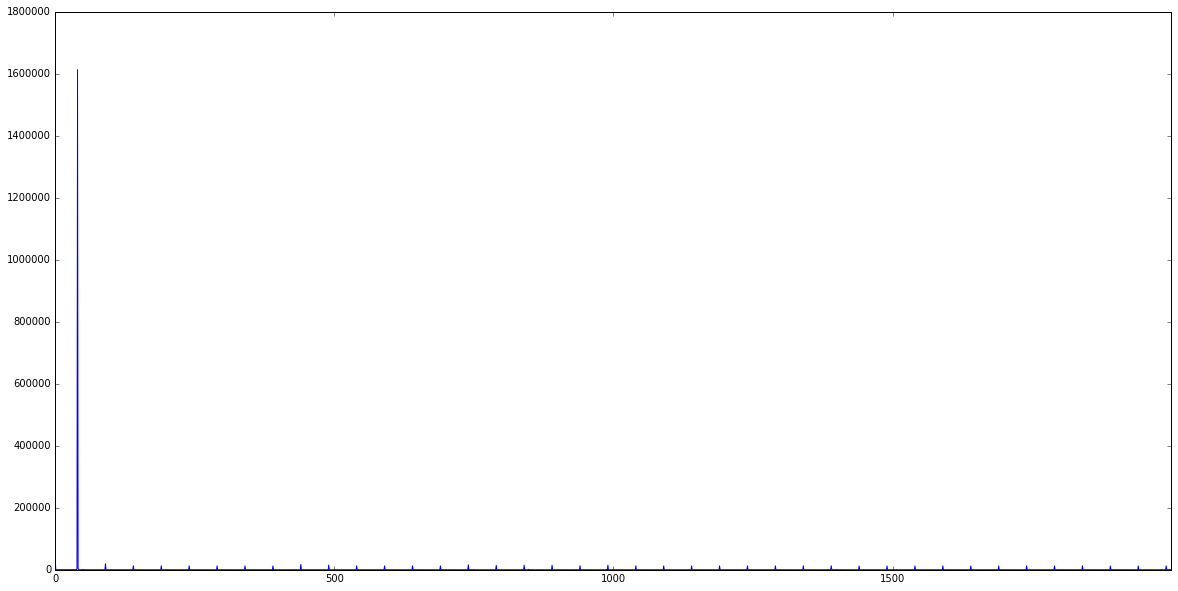

In [7]:
df_fwrite_ticks['duration'].plot(figsize=(20,10))

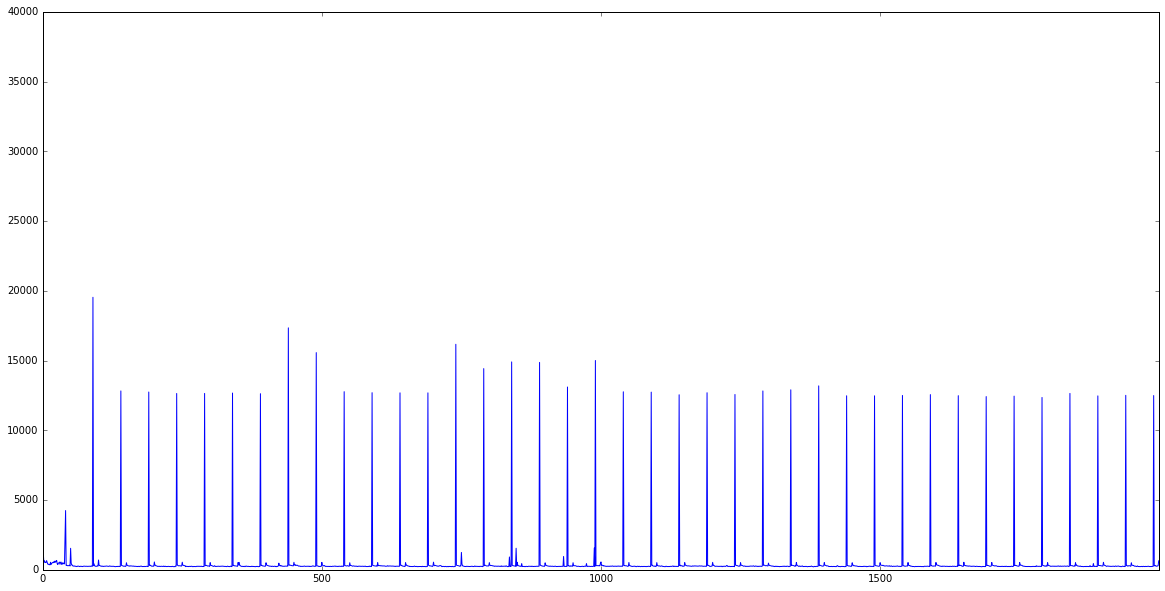

In [8]:
# Filter out the huge duration to get a sense of the 'standard' durations
df_fwrite_ticks[df_fwrite_ticks['duration'] < 100000]['duration'].plot(figsize=(20,10))

In [9]:
bins = pd.cut(df_fwrite_ticks['duration'], 100)

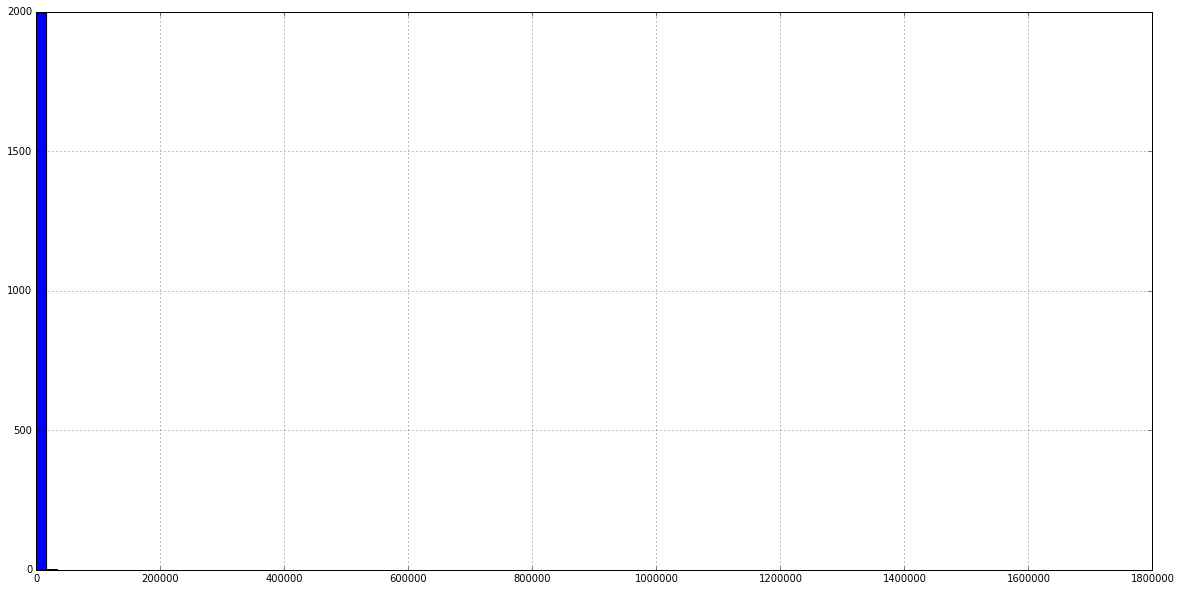

In [10]:
# Plot the whole histogram (depending on the way it is spread, it might not help to vizualize it...)
df_fwrite_ticks['duration'].hist(bins=100, figsize=(20,10))

Number of write durations below 1000 ticks: 1953


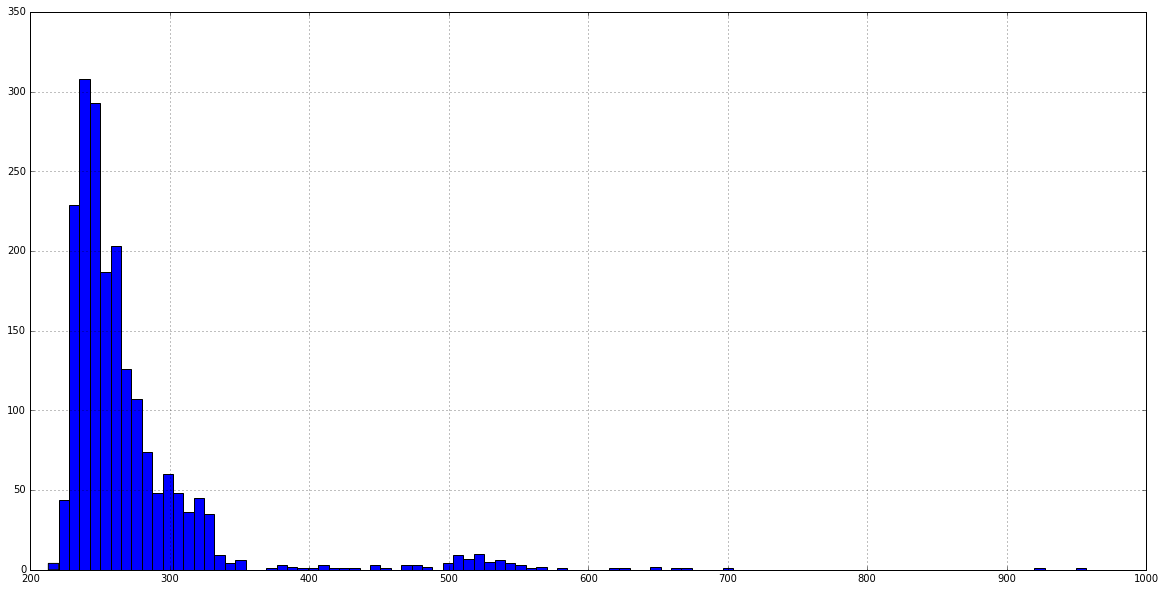

In [11]:
# Plot the histogram zooming on the durations below 1000 ticks
below_1000 = df_fwrite_ticks['duration'] < 1000
df_fwrite_ticks_below_1000 = df_fwrite_ticks[below_1000]
print("Number of write durations below 1000 ticks: %d" % len(df_fwrite_ticks_below_1000))
df_fwrite_ticks_below_1000['duration'].hist(bins=100, figsize=(20,10))

Number of write durations between 1000 and 200000 ticks: 46


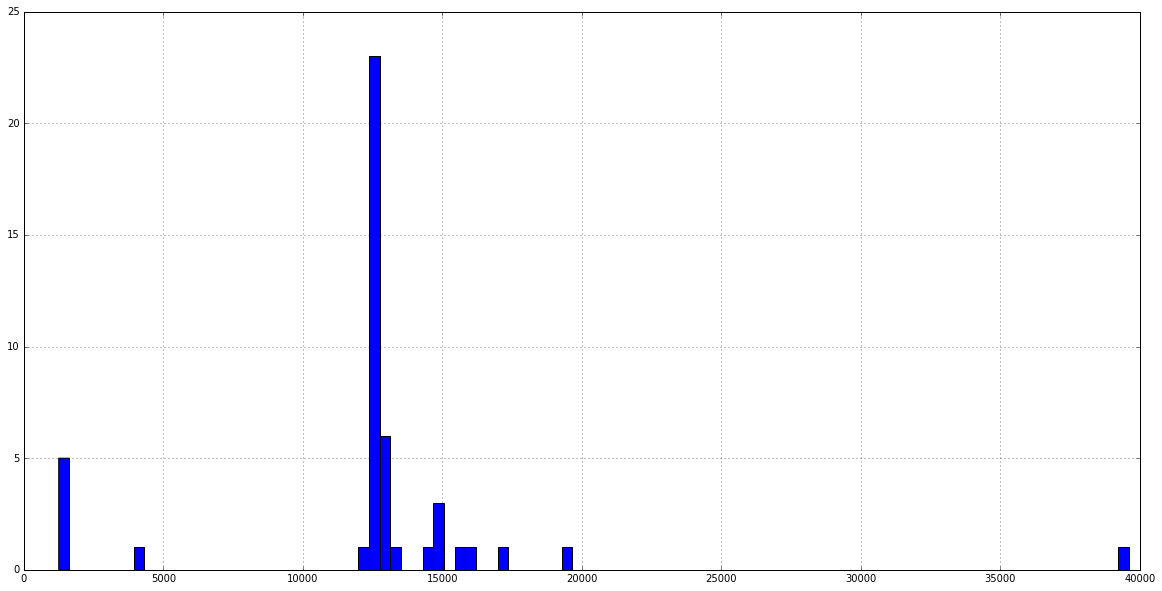

In [12]:
# Plot the histogram zooming on the durations above 1000 ticks and below 200000
above1000_below200000 = (df_fwrite_ticks['duration'] > 1000) & (df_fwrite_ticks['duration'] <= 200000)
df_fwrite_ticks_above1000_below200000 = df_fwrite_ticks[above1000_below200000]['duration']
print("Number of write durations between 1000 and 200000 ticks: %d" % len(df_fwrite_ticks_above1000_below200000))
df_fwrite_ticks_above1000_below200000.hist(bins=100, figsize=(20,10))

Number of write durations > 200000 ticks: 1


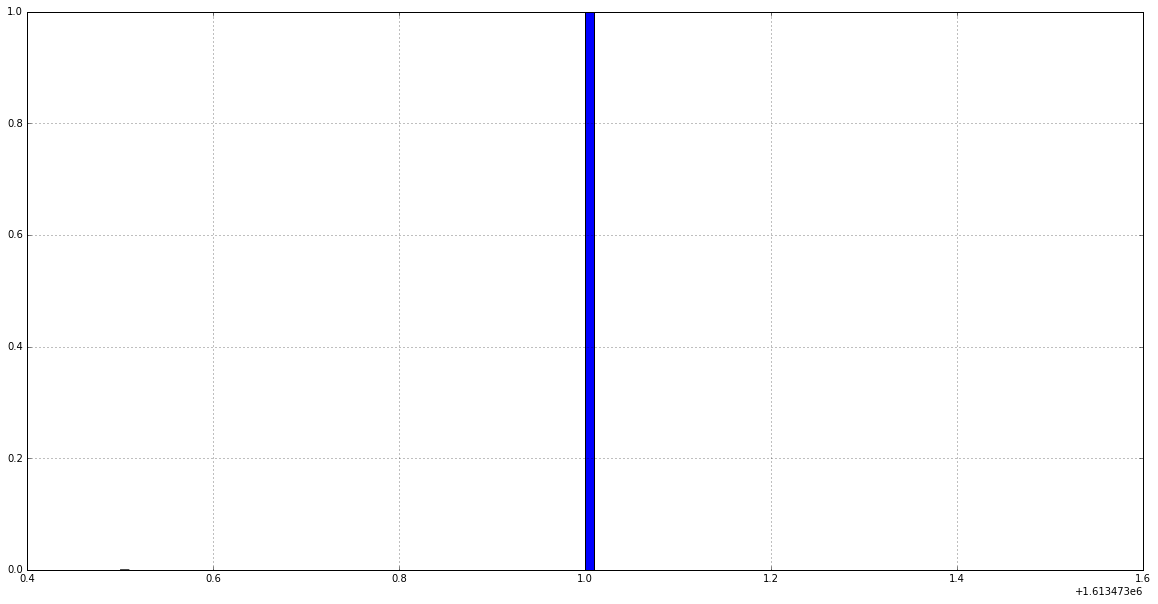

In [13]:
# Finally, plot the histogram zooming on the durations above 200000
above_200000 = df_fwrite_ticks['duration'] > 200000
df_fwrite_ticks_above200000 = df_fwrite_ticks[above_200000]['duration']
print("Number of write durations > 200000 ticks: %d" % len(df_fwrite_ticks_above200000))
df_fwrite_ticks_above200000.hist(bins=100, figsize=(20,10))

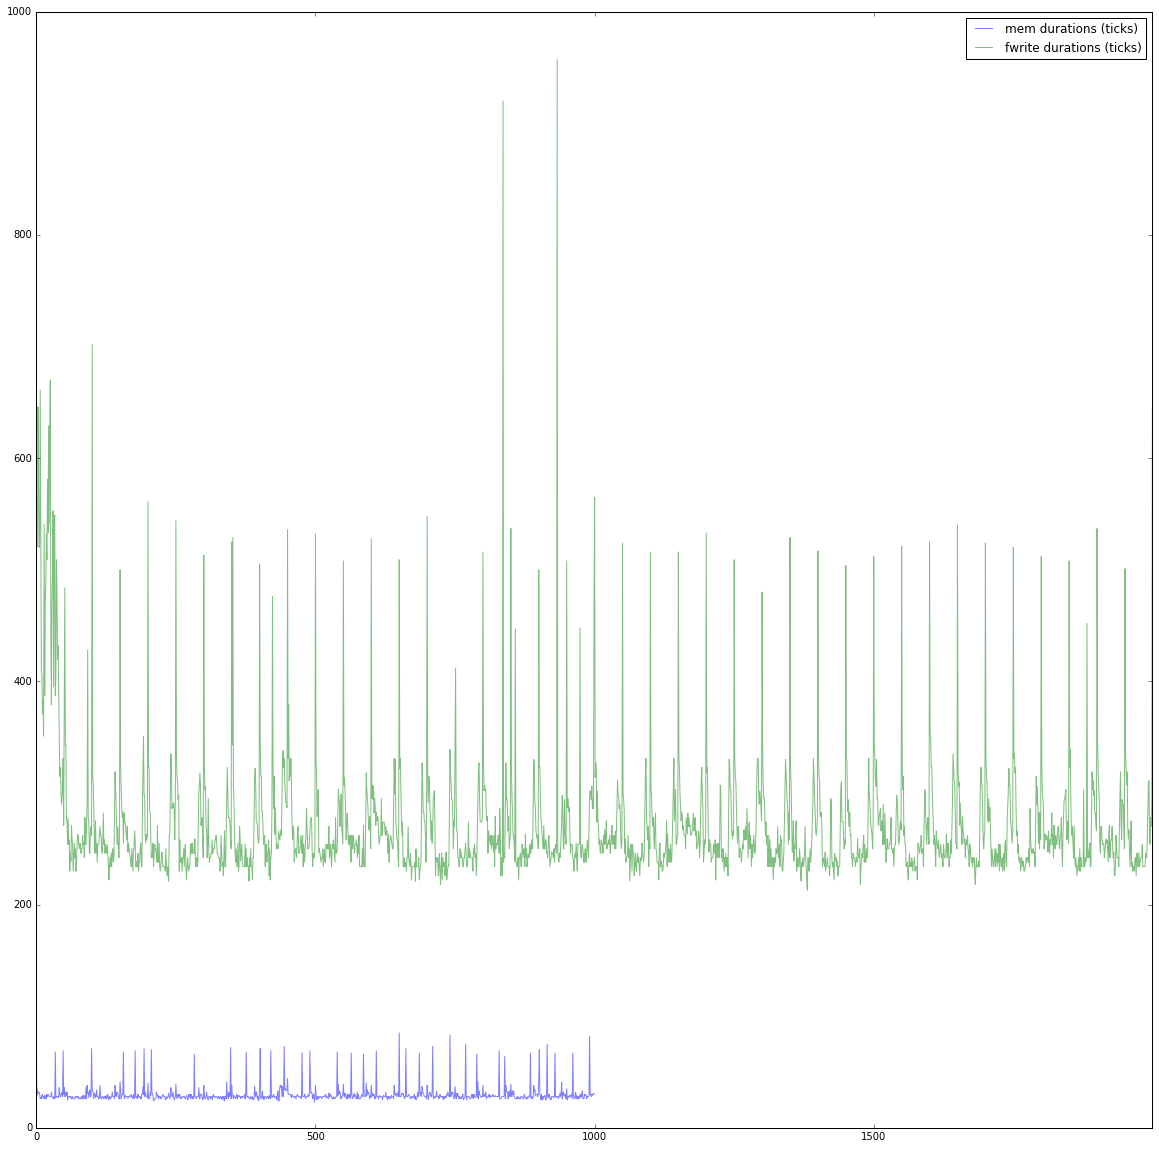

In [14]:
# Compare the write ticks durations and the memset ticks durations
df_memset_ticks['duration'].plot(alpha=0.5, label='mem durations (ticks)', figsize=(20,20))
df_fwrite_ticks_below_1000['duration'].plot(alpha=0.5, label='fwrite durations (ticks)', figsize=(20,20))
pyplot.legend(loc='upper right')